In [1]:
from scipy.io import readsav
import matplotlib.pyplot as plt 
from matplotlib import dates, colors
import numpy as np 
import pandas as pd 
from sunpy.time import parse_time

In [2]:
data_file = "fermi2stix_fit_peak.sav"

In [3]:
data = readsav(data_file)["out"]

In [4]:
data.dtype.names

('STIX_DATA',
 'STIX_TIME_EDGES',
 'STIX_TIME_ARR',
 'STIX_ENERGY_EDGES',
 'FIT_PARAMS',
 'FIT_PARAM_SIGMAS',
 'FIT_NAME',
 'FERMI_FIT_TIMES_EDGES',
 'FERMI_EEDGES',
 'C_RATE_PRED',
 'C_RATE_NT_PRED')

In [5]:
stix_data_struct = data["STIX_DATA"][0]
stix_data = stix_data_struct["DATA"][0]
stix_data_err = stix_data_struct["EDATA"][0]
stix_time_arr = data["STIX_TIME_ARR"][0]
stix_tedges = data["STIX_TIME_EDGES"][0]
stix_eedges = data["STIX_ENERGY_EDGES"][0]
fermi_fit_params = data["FIT_PARAMS"][0]
fermi_fit_params_err = data["FIT_PARAM_SIGMAS"][0]
fermi_fit_name = data["FIT_NAME"].astype(str)[0]
fermi_fit_tedges = data["FERMI_FIT_TIMES_EDGES"][0]


fermi_eedges = data["FERMI_EEDGES"][0]


stix_pred = data["C_RATE_PRED"][0]
stix_nt_pred = data["C_RATE_NT_PRED"][0]

In [6]:
stix_data.shape

(1225, 27)

In [7]:
stix_tedges[:, 0]

array([1.35122842e+09, 1.35122844e+09, 1.35122846e+09, ...,
       1.35123229e+09, 1.35123230e+09, 1.35123232e+09])

In [8]:
stix_fit_ind = np.where((stix_tedges[:, 0]>=fermi_fit_tedges[0])&(stix_tedges[:, 1]<=fermi_fit_tedges[1]))[0]

In [9]:
stix_over_int = stix_data[stix_fit_ind, :]
stix_err_over_int = stix_data_err[stix_fit_ind, :]

In [10]:
stix_obs = np.mean(stix_over_int, axis=0)
stix_obs_err = np.sqrt((np.sum((stix_err_over_int/len(stix_fit_ind))**2, axis=0)))

In [11]:
stix_energy = np.mean(stix_eedges, axis=1)

In [12]:
stix_energy

array([ 4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5, 11.5, 12.5, 13.5, 14.5,
       15.5, 17. , 19. , 21. , 23.5, 26.5, 30. , 34. , 38. , 42.5, 47.5,
       53. , 59.5, 66.5, 73. , 80. ], dtype=float32)

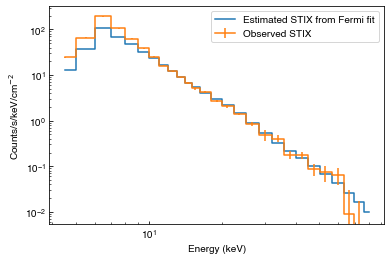

In [13]:
fig, ax = plt.subplots()
ax.plot(stix_energy, stix_pred, drawstyle="steps-mid", label="Estimated STIX from Fermi fit")
ax.errorbar(stix_energy, stix_obs, stix_obs_err, drawstyle="steps-mid", label="Observed STIX")
ax.set_ylabel("Counts/s/keV/cm$^{-2}$")
ax.set_xlabel("Energy (keV)")
ax.legend()
plt.yscale("log")
plt.xscale("log")

In [14]:
ratio_low = stix_pred/(stix_obs-stix_obs_err/2)
ratio_high = stix_pred/(stix_obs+stix_obs_err/2)


ratio = stix_pred/stix_obs
ratio_err = ratio*np.sqrt((stix_obs_err/stix_obs)**2)


(0.0, 2.0)

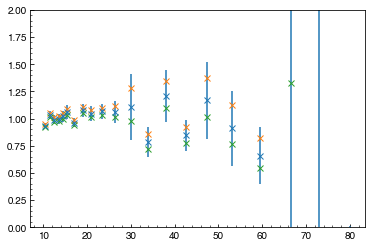

In [15]:
plt.errorbar(stix_energy[stix_energy>10], ratio[stix_energy>10], ratio_err[stix_energy>10], marker='x', ls='')
plt.plot(stix_energy[stix_energy>10], ratio_low[stix_energy>10], marker='x', ls='')
plt.plot(stix_energy[stix_energy>10], ratio_high[stix_energy>10], marker='x', ls='')
plt.ylim(0, 2)
# plt.xlim(8, 70)

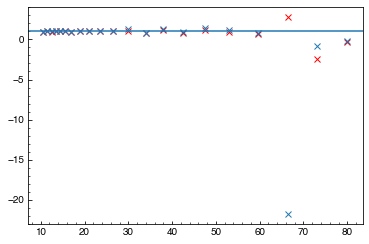

In [16]:
plt.plot(stix_energy[stix_energy>10], ratio[stix_energy>10], marker='x', ls='', color='r')
plt.plot(stix_energy[stix_energy>10], ratio_low[stix_energy>10], marker='x', ls='')
#plt.plot(stix_energy[stix_energy>10], ratio_high[stix_energy>10], marker='x', ls='')
plt.axhline(1)

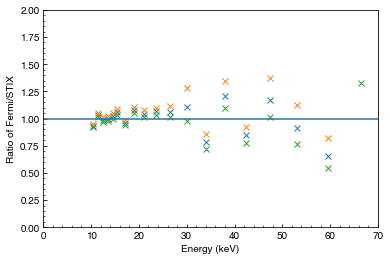

In [17]:
fig, ax = plt.subplots()
ax.plot(stix_energy[stix_energy>10], ratio[stix_energy>10], marker='x', ls='')
ax.plot(stix_energy[stix_energy>10], ratio_low[stix_energy>10], marker='x', ls='')
ax.plot(stix_energy[stix_energy>10], ratio_high[stix_energy>10], marker='x', ls='')

ax.set_xlabel("Energy (keV)")
ax.set_ylabel("Ratio of Fermi/STIX")
ax.set_ylim(0, 2)
ax.set_xlim(0, 70)
plt.axhline(1)

NameError: name 'errors' is not defined

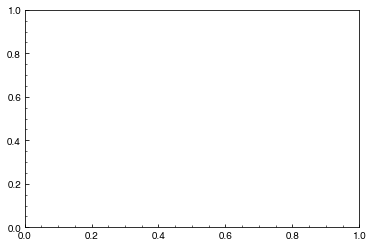

In [18]:
fig, ax = plt.subplots()
plt.errorbar(stix_energy[stix_energy>10], ratio[stix_energy>10], errors[stix_energy>10], marker='x', ls='')
ax.set_xlabel("Energy (keV)")
ax.set_ylabel("Ratio of Fermi/STIX")
ax.set_ylim(0, 2)
#ax.set_xlim(9, 70)
#ax.set_xscale("log")
plt.axhline(1)